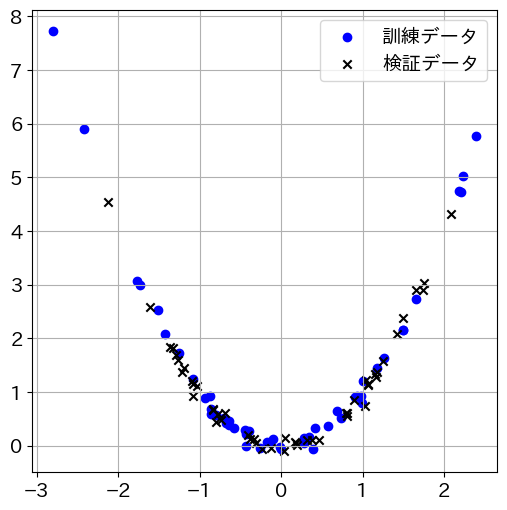

epoch = 0  loss = 5.7888
epoch = 100  loss = 0.5388
epoch = 200  loss = 0.0655
epoch = 300  loss = 0.0521
epoch = 400  loss = 0.0494


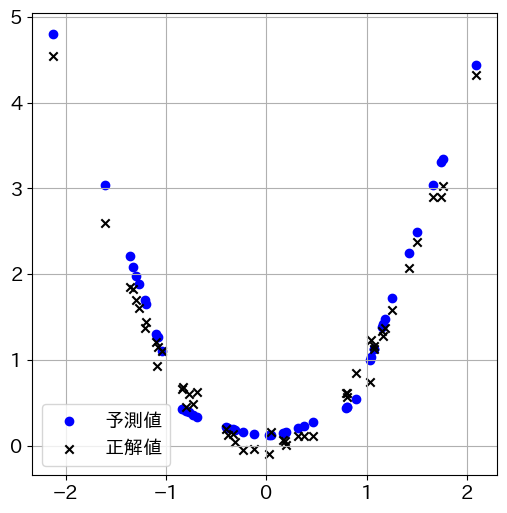

l1.weight =  [[ 0.34673542]
 [ 0.74961907]
 [ 1.2504399 ]
 [ 0.05029422]
 [-0.28959113]
 [ 0.38796896]
 [-1.1392888 ]
 [ 1.1436841 ]
 [-1.0611743 ]
 [-0.349403  ]]
l1.bias =  [ 1.0036294   0.51783514 -0.7711097   0.15454602  0.9638014  -0.57861763
  0.08616386 -0.1111507  -0.5958465  -0.15028991]
l2.weight =  [[-3.03600598e-02  2.19806299e-01  6.14501163e-03  1.26857236e-01
  -9.95734930e-02 -2.32342571e-01  3.55831861e-01  4.24202353e-01
   5.03966410e-04  1.83301479e-01]
 [-3.70617241e-01  3.26355696e-02  3.25490177e-01  2.76437670e-01
   1.01401322e-01 -1.71433285e-01  2.15728804e-02  3.82329375e-01
   6.84775971e-03 -1.03834875e-01]
 [-2.32817471e-01 -3.15343946e-01  1.68040261e-01  2.43288711e-01
  -1.38745248e-01 -1.18411474e-01  5.81789762e-03  1.36533096e-01
   1.34269819e-02 -4.31628674e-02]
 [ 1.28582820e-01 -1.89559162e-01 -2.59547323e-01  1.43864259e-01
   4.75453772e-02 -6.39459044e-02  1.92917977e-02  4.00500856e-02
  -1.60710439e-01  1.42858505e-01]
 [-3.06339681e-01 -9.

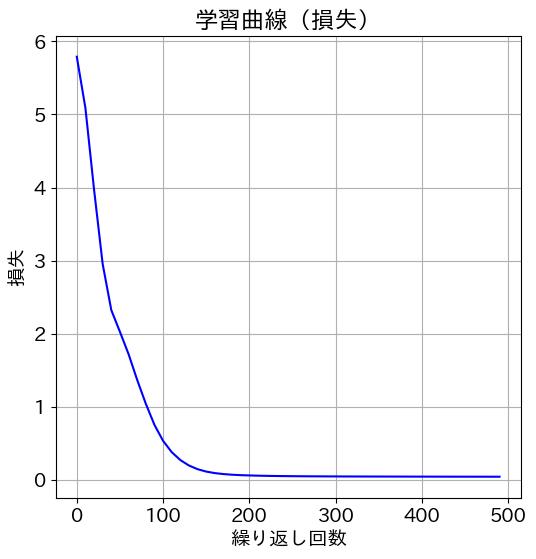

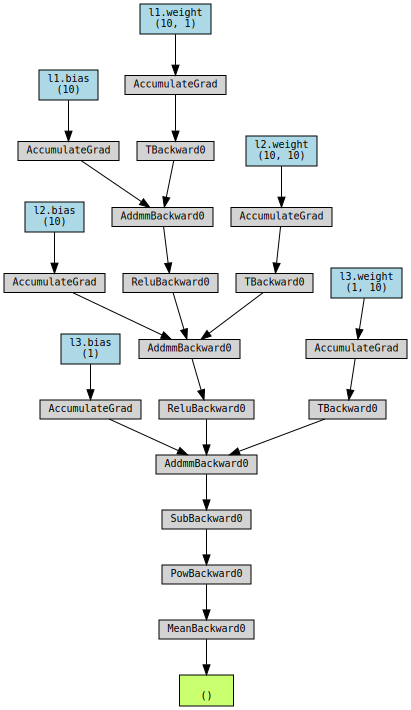

<generator object Module.named_parameters at 0x7f1d72785340>
<generator object Module.named_parameters at 0x7f1d72785340>
<generator object Module.named_parameters at 0x7f1d72785340>


In [ ]:
!pip install japanize-matplotlib | tail -n 1

import matplotlib.pyplot as plt
import japanize_matplotlib

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['axes.grid'] = True

!pip install torchviz | tail -1
from torchviz import make_dot

import torch
from torch import nn
import numpy as np

#======================================================================#

np.random.seed(123)
x = np.random.randn(100,1)
y = x**2 + np.random.randn(100,1)*0.1
x_train = x[:50,:]
y_train = y[:50,:]
x_test = x[50:,:]
y_test = y[50:,:]

plt.scatter(x_train, y_train, c='b', label='訓練データ')
plt.scatter(x_test, y_test, c='k', marker='x', label='検証データ')
plt.legend()
plt.show()

#======================================================================#

def mse(Yp, Y):
    loss = ((Yp - Y)**2).mean()
    return loss

X = torch.tensor(x_train).float()
Y = torch.tensor(y_train).float()

l1 = nn.Linear(1, 10)
l2 = nn.Linear(10, 10)
l3 = nn.Linear(10, 1)
relu = nn.ReLU(inplace=True)

net2 = nn.Sequential(l1,relu,l2,relu,l3)

num_epochs = 500
lr = 0.001
import torch.optim as optim
optimizer = optim.SGD([l1.weight, l1.bias, l2.weight, l2.bias, l3.weight, l3.bias], lr=lr, momentum=0.9)
history = np.zeros((0,2))
for epoch in range(num_epochs):
    Yp = net2(X)
    loss = mse(Yp,Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10 == 0:
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        if epoch % 100 == 0:
            print(f'epoch = {epoch}  loss = {loss:.4f}')

#======================================================================#

XT = torch.tensor(x_test).float()
Yp = net2(XT)
plt.scatter(x_test, Yp.data.numpy(), c='b', label='予測値')
plt.scatter(x_test, y_test, c='k', marker='x', label='正解値')
plt.legend()
plt.show()

#======================================================================#

print('l1.weight = ', l1.weight.data.numpy())    # l1.weight =  [[ 0.86484945] ...
print('l1.bias = ', l1.bias.data.numpy())        # l1.bias =  [-0.29586294 ...
print('l2.weight = ', l2.weight.data.numpy())    # l2.weight =  [[ 4.62050401e-02  ...
print('l2.bias = ', l2.bias.data.numpy())        # l2.bias =  [-0.16639839 ...
print('l3.weight = ', l3.weight.data.numpy())    # l3.weight =  [[ 0.06162301 ...
print('l3.bias = ', l3.bias.data.numpy())        # l3.bias =  [-0.12132882]

print(f'初期状態： 損失：{history[0,1]:.4f}')    # 初期状態： 損失：4.1422
print(f'最終状態： 損失：{history[-1,1]:.4f}')   # 最終状態： 損失：0.0318

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線（損失）')
plt.show()

#======================================================================#

params = {
    "l1.weight": l1.weight,
    "l1.bias": l1.bias,
    "l2.weight": l2.weight,
    "l2.bias": l2.bias,
    "l3.weight": l3.weight,
    "l3.bias": l3.bias
}

dots = make_dot(loss, params=params)
display(dots)

print(l1.named_parameters())
print(l2.named_parameters())
print(l3.named_parameters())